# Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# https://pypi.org/project/noise/
from noise import pnoise2, snoise2,pnoise3

In [3]:
nwidth = 256
nheight = 256

## Perlin noise

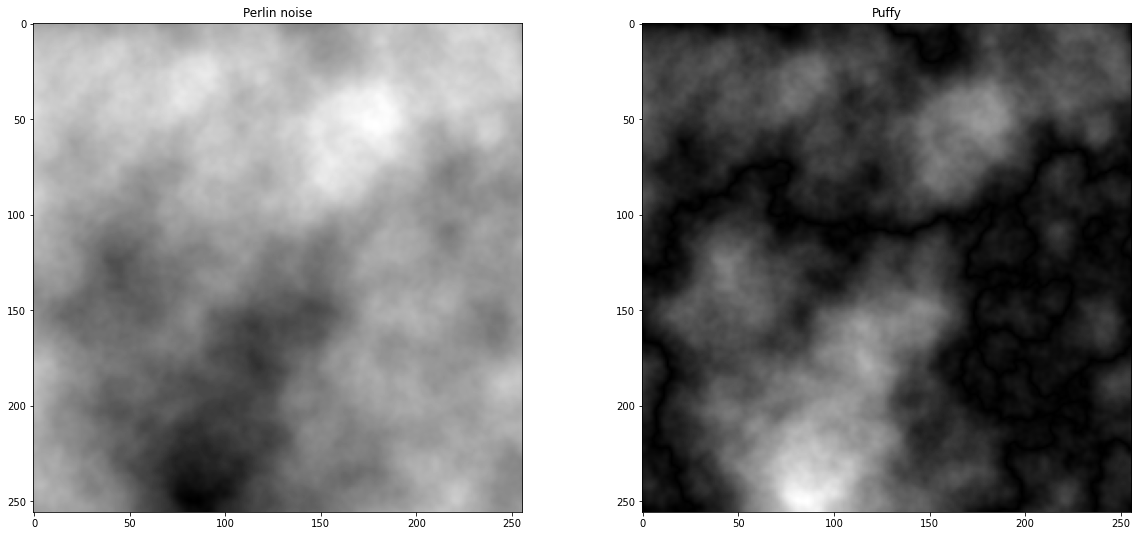

In [4]:
def perlin_noise_viz(width, height, octaves):
    # Gen noise
    noise = np.ndarray(shape=(width,height), dtype=float)
    for y in range(height):
        for x in range(width):
            n = pnoise2(x/width, y/height, octaves=octaves)
            noise[x][y] = n

    # Puffy
    puffy = np.abs(noise*2)+1

    # Plot
    fig = plt.figure(figsize=[10*2,9])
    plt.subplot(1,2,1)
    plt.title("Perlin noise")
    plt.imshow(noise, cmap='gray')

    plt.subplot(1,2,2)
    plt.title("Puffy")
    plt.imshow(puffy, cmap='gray')

    plt.show()

# viz
perlin_noise_viz(nwidth, nheight, 7)


## Worley noise

In [5]:
# https://stackoverflow.com/questions/65703414/how-can-i-make-a-worley-noise-algorithm-faster
def worley_noise(width, height, density):
    from numpy import random, mgrid, dstack, empty
    from scipy.spatial import cKDTree

    points = [[random.randint(0, height), random.randint(0, width)] for _ in range(density)]  # Generates Points(y, x)
   
    coord = dstack(mgrid[0:height, 0:width])  # Makes array with coordinates as values

    tree = cKDTree(points)  # Build Tree
    distances = tree.query(coord, workers=-1)[0]  # Calculate distances (workers=-1: Uses all CPU Cores)
    return distances

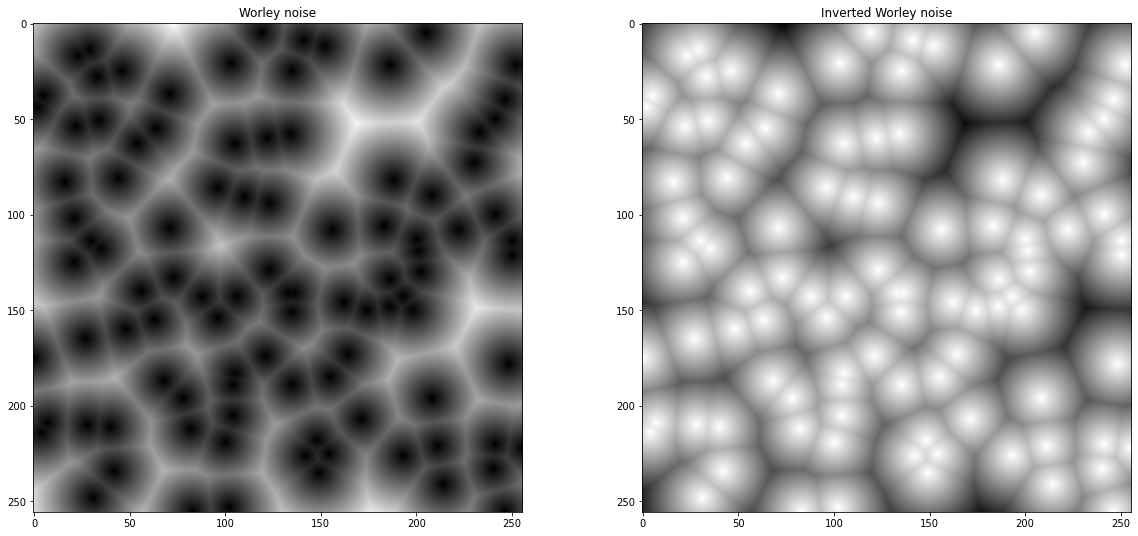

In [6]:
def worley_noise_viz(width, height, density):
    noise = worley_noise(width,height,density)

    fig = plt.figure(figsize=[10*2,9])

    plt.subplot(1,2,1)
    plt.title("Worley noise")
    plt.imshow(noise, cmap='gray')

    inverted_worley = 1-noise
    plt.subplot(1,2,2)
    plt.title("Inverted Worley noise")
    plt.imshow(inverted_worley, cmap='gray')

    plt.show()

worley_noise_viz(nwidth,nheight,100)

## Reference

- GPU Pro 7 | Real-Time Volumetric Cloudscapes